In [76]:
import pandas as pd
import numpy as np

# buy and hold
1. 결측치 및 이상치를 조회 및 삭제
2. 종가를 기준으로 수익률 측정
3. 일별 수익률 파생변수
4. CAGR, MDD, VOL, sharpe를 출력

In [77]:
# 데이터 로드
df = pd.read_csv('../csv/AAPL.csv', index_col='Date')
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0


In [78]:
# 결측치 및 이상치 조회
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_74592\3222757503.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.isin([np.nan, np.inf, -np.inf]).any(1)]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN
1981-08-21,0.363839,0.363839,0.359375,0.359375,0.287367,NaN


In [79]:
# 결측치 및 이상치를 제외한 데이터를 출력
df = df[~df.isin([np.nan, np.inf,-np.inf]).any(1)]

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_74592\4130496626.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf,-np.inf]).any(1)]


In [80]:
# 종가만 사용(Adj Close)
# case1
# df[['Adj Close']] # 더블 대괄호 - 데이터프레임으로 전환
# case2
price_df = df.loc[:, ['Adj Close']]

<AxesSubplot: xlabel='Date'>

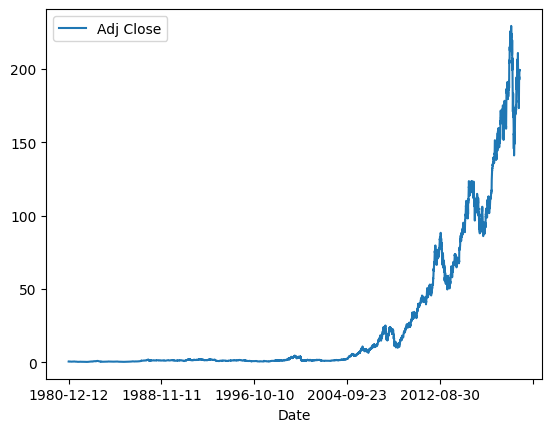

In [81]:
price_df.plot()

In [82]:
# 일별 수익률 생성
# (오늘 날짜의 종가 - 어제 날짜의 종가) / 어제 날짜의 종가
# daily_rtn 파생변수로 생성

# case1 diff(), shift()
#price_df['Daily_rtn'] = price_df['Adj Close'].diff() / price_df['Adj Close'].shift()

# case2 shift()
#(price_df['Adj Close']-price_df['Adj Close'].shift()) / price_df['Adj Close'].shift()

# case3 pct_change()
price_df['Daily_rtn'] = price_df['Adj Close'].pct_change()

In [83]:
price_df.head(10)

,Adj Close,Daily_rtn
Date,,
1980-12-12,0.410525,NaN
1980-12-15,0.389106,-0.052175
1980-12-16,0.360548,-0.073394
1980-12-17,0.369472,0.024751
1980-12-18,0.380182,0.028987
1980-12-19,0.403385,0.061031
1980-12-22,0.423019,0.048673
1980-12-23,0.440868,0.042194
1980-12-24,0.464072,0.052633


In [84]:
# 일별 수익률 가지고  총 수익률 구하려면?
# 누적곱 cumprod()
# St_rtn 파생변수 생성
price_df['St_rtn'] = (1 + price_df['Daily_rtn']).cumprod()

In [85]:
price_df.head(10)

,Adj Close,Daily_rtn,St_rtn
Date,,,
1980-12-12,0.410525,NaN,NaN
1980-12-15,0.389106,-0.052175,0.947825
1980-12-16,0.360548,-0.073394,0.878261
1980-12-17,0.369472,0.024751,0.899999
1980-12-18,0.380182,0.028987,0.926087
1980-12-19,0.403385,0.061031,0.982608
1980-12-22,0.423019,0.048673,1.030434
1980-12-23,0.440868,0.042194,1.073913
1980-12-24,0.464072,0.052633,1.130435


<AxesSubplot: xlabel='Date'>

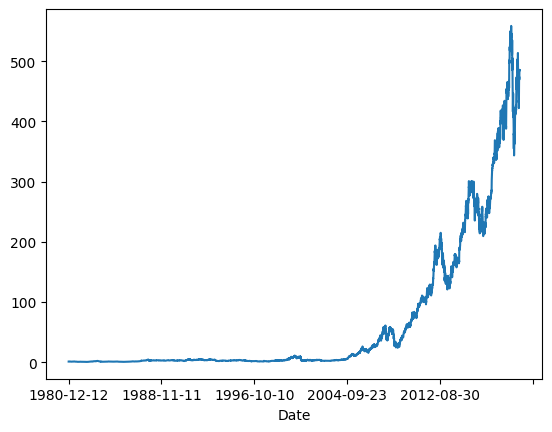

In [86]:
price_df['St_rtn'].plot()

In [87]:
# 종가를 기준으로 수익률 계산
# 마지막 데이터의 종가 / 처음 데이터의 종가
price_df.index
first_date = price_df.index[0]
last_date = price_df.index[-1]

# 구매일에 종가 출력 
price_df.loc[last_date, 'Adj Close'] / price_df.loc[first_date, 'Adj Close']  



485.15924243346933

In [88]:
# 누적 수익률 출력
price_df.loc[last_date, 'St_rtn']

485.1592424334637

<AxesSubplot: xlabel='Date'>

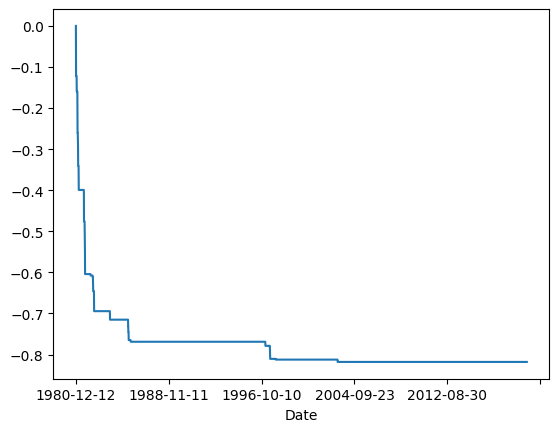

In [89]:
# backtesting

# cummax() -> 기준가에서 최고가 저장
# cummin() -> 기준가에서 최저가 저장

historical_max = price_df['Adj Close'].cummax()
daily_drawdown = price_df['Adj Close'] / historical_max - 1.0
# 최대 낙폭
historical_min = daily_drawdown.cummin()
historical_min.plot()

In [90]:
# CAGR, MDD, VOL, sharpe 출력
# CAGR : 일별 date 사용 -> 전체 연도를 계산하는 경우 영업일 기간을 252일 기준으로 나눈 역수 제곱한 후 -1
# MDD : 최대 낙폭
# VOL : 연 주가 수익률 표준편차 = 일별 주가 수익률 * 252일 제곱근
# sharpe : 총 위험 1단위당 초과 수익률

CAGR = price_df.loc[last_date, 'St_rtn'] ** (252/len(price_df)) - 1
MDD = historical_min.min()
VOL = np.std(price_df['Daily_rtn'] * np.sqrt(252))
sharpe = np.mean(price_df['Daily_rtn'])/np.std(price_df['Daily_rtn'])*np.sqrt(252)

In [91]:
print('CAGR : ', round(CAGR*100, 2), '%')
print('Sharpe : ', round(sharpe, 2))
print('VOL : ', round(VOL*100, 2), '%')
print('MDD : ', round(-1*MDD*100, 2), '%')

CAGR :  17.4 %
Sharpe :  0.58
VOL :  45.7 %
MDD :  81.8 %


In [105]:
import buy_and_hold as bah
import imp
imp.reload(bah)

<module 'buy_and_hold' from 'c:\\Users\\ssjjk\\Desktop\\6기\\221220\\buy_and_hold\\__init__.py'>

In [106]:
# 데이터프레임 로드
df_2 = pd.read_csv('../csv/AMZN.csv', index_col='Date')

In [107]:
# 클래스 생성
bh = bah.BuyAndHold(df_2, 'Adj Close') 

In [108]:
bh.drop_na()

c:\Users\ssjjk\Desktop\6기\221220\buy_and_hold\__init__.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  self.df = self.df[~self.df.isin([np.nan, np.inf, -np.inf]).any(1)]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...
2019-06-18,1901.349976,1921.670044,1899.790039,1901.369995,1901.369995,3895700
2019-06-19,1907.839966,1919.579956,1892.469971,1908.790039,1908.790039,2895300
2019-06-20,1933.329956,1935.199951,1905.800049,1918.189941,1918.189941,3217200


In [109]:
bh.add_col()

,Open,High,Low,Close,Adj Close,Volume,daily_rtn,st_rtn
Date,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,-0.117021,0.882979
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,-0.012049,0.872340
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,-0.042683,0.835107
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,-0.127389,0.728723
...,...,...,...,...,...,...,...,...
2019-06-18,1901.349976,1921.670044,1899.790039,1901.369995,1901.369995,3895700,0.008133,970.912503
2019-06-19,1907.839966,1919.579956,1892.469971,1908.790039,1908.790039,2895300,0.003902,974.701462
2019-06-20,1933.329956,1935.199951,1905.800049,1918.189941,1918.189941,3217200,0.004925,979.501413


In [110]:
bh.testing()

[0.365793900198663, 0.8136327617304074, 0.6008984712355606, -0.944042179261863]

In [112]:
import yfinance as yf

In [119]:
df_3 = yf.download('003490.KS', start='2018-01-01')
df_3

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,34100.0,36100.0,34100.0,35900.0,35715.164062,1360084
2018-01-03,35950.0,36150.0,35550.0,35750.0,35565.937500,497403
2018-01-04,35500.0,35950.0,34900.0,34900.0,34720.312500,571308
2018-01-05,35250.0,35250.0,34450.0,34900.0,34720.312500,489822
2018-01-08,35100.0,36150.0,35100.0,36100.0,35914.136719,841491
...,...,...,...,...,...,...
2022-12-14,25500.0,25650.0,25150.0,25250.0,25250.000000,1065370
2022-12-15,25300.0,25500.0,24800.0,24850.0,24850.000000,1143521
2022-12-16,24500.0,24750.0,24200.0,24700.0,24700.000000,1245099


In [124]:
bh_2 = bah.BuyAndHold(df_3, 'Close') 

In [125]:
bh_2.drop_na()

c:\Users\ssjjk\Desktop\6기\221220\buy_and_hold\__init__.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  self.df = self.df[~self.df.isin([np.nan, np.inf, -np.inf]).any(1)]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,34100.0,36100.0,34100.0,35900.0,35715.164062,1360084
2018-01-03,35950.0,36150.0,35550.0,35750.0,35565.937500,497403
2018-01-04,35500.0,35950.0,34900.0,34900.0,34720.312500,571308
2018-01-05,35250.0,35250.0,34450.0,34900.0,34720.312500,489822
2018-01-08,35100.0,36150.0,35100.0,36100.0,35914.136719,841491
...,...,...,...,...,...,...
2022-12-14,25500.0,25650.0,25150.0,25250.0,25250.000000,1065370
2022-12-15,25300.0,25500.0,24800.0,24850.0,24850.000000,1143521
2022-12-16,24500.0,24750.0,24200.0,24700.0,24700.000000,1245099


In [126]:
bh_2.add_col()

,Open,High,Low,Close,Adj Close,Volume,daily_rtn,st_rtn
Date,,,,,,,,
2018-01-02,34100.0,36100.0,34100.0,35900.0,35715.164062,1360084,NaN,NaN
2018-01-03,35950.0,36150.0,35550.0,35750.0,35565.937500,497403,-0.004178,0.995822
2018-01-04,35500.0,35950.0,34900.0,34900.0,34720.312500,571308,-0.023776,0.972145
2018-01-05,35250.0,35250.0,34450.0,34900.0,34720.312500,489822,0.000000,0.972145
2018-01-08,35100.0,36150.0,35100.0,36100.0,35914.136719,841491,0.034384,1.005571
...,...,...,...,...,...,...,...,...
2022-12-14,25500.0,25650.0,25150.0,25250.0,25250.000000,1065370,-0.011742,0.703343
2022-12-15,25300.0,25500.0,24800.0,24850.0,24850.000000,1143521,-0.015842,0.692201
2022-12-16,24500.0,24750.0,24200.0,24700.0,24700.000000,1245099,-0.006036,0.688022


In [127]:
bh_2.testing()

[-0.07609454195203713,
 0.029661156890595602,
 0.4177720663388616,
 -0.760603518158236]

In [137]:
bh_2.df

,Open,High,Low,Close,Adj Close,Volume,daily_rtn,st_rtn
Date,,,,,,,,
2018-01-02,34100.0,36100.0,34100.0,35900.0,35715.164062,1360084,NaN,NaN
2018-01-03,35950.0,36150.0,35550.0,35750.0,35565.937500,497403,-0.004178,0.995822
2018-01-04,35500.0,35950.0,34900.0,34900.0,34720.312500,571308,-0.023776,0.972145
2018-01-05,35250.0,35250.0,34450.0,34900.0,34720.312500,489822,0.000000,0.972145
2018-01-08,35100.0,36150.0,35100.0,36100.0,35914.136719,841491,0.034384,1.005571
...,...,...,...,...,...,...,...,...
2022-12-14,25500.0,25650.0,25150.0,25250.0,25250.000000,1065370,-0.011742,0.703343
2022-12-15,25300.0,25500.0,24800.0,24850.0,24850.000000,1143521,-0.015842,0.692201
2022-12-16,24500.0,24750.0,24200.0,24700.0,24700.000000,1245099,-0.006036,0.688022
